<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.






- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors



- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

def suma_1(x,n):
  expo=[]
  for i in range(n):
    x_n=(((-1)**i)*(x**i))/(math.factorial(i))
    expo.append(x_n)
  return sum(expo)
suma_1(1,36)


0.36787944117144245

In [10]:
def suma_error1(x,n):
  expo=[]
  for i in range(n):
    x_n=(((-1)**i)*(x**i))/(math.factorial(i))
    expo.append(x_n)
    suma_e=sum(expo)
    e_2=abs(((-1)**(i+1)*(x**(i+1)))/(math.factorial(i+1)))
    if e_2<abs((suma_e)*10**(-7)):
      return suma_e,e_2,i

suma_error1(1,36)

(0.3678794642857144, 2.505210838544172e-08, 10)

In [35]:
serie = suma_1(1,100)
exacta = math.exp(-1) 
print("La diferencia entre la función creada con la función dada por libreria es de",abs(serie-exacta))

La diferencia entre la función creada con la función dada por libreria es de 1.1102230246251565e-16


In [37]:
def suma_3(x,n):
  e=[]
  for i in range(n):
    x_n=(x**i)/(math.factorial(i))
    e.append(x_n)
  return 1/sum(e)
suma_3(1,100)

0.3678794411714423

In [49]:
serie = suma_3(1,20)
exacta = math.exp(-1) 
print("La diferencia entre la función creada con la función dada por libreria es de",abs(serie-exacta))

La diferencia entre la función creada con la función dada por libreria es de 5.551115123125783e-17


In [44]:
for x in [1, 2, 5, 10, 20, 50, 100]:
  N = 5
  while True:
    taylor = suma_1(x, N)
    if abs((-x)**(N+1) / math.factorial(N+1)) <= abs(taylor) * 1e-7:
      break
    N += 1
    exact = math.exp(-x)
    error = abs(taylor - exact)
  print('Con x=',x,'el error es de',error)

Con x= 1 el error es de 2.503273002163464e-06
Con x= 2 el error es de 1.6567927282884476e-07
Con x= 5 el error es de 3.114787229356597e-09
Con x= 10 el error es de 3.108517017061255e-11
Con x= 20 el error es de 1.5133429956444945e-09
Con x= 50 el error es de 7015.779282092376
Con x= 100 el error es de 2.8756589343060853e+26


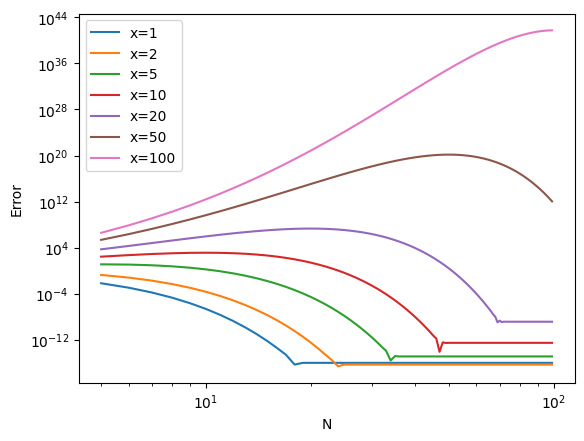

In [46]:
x_l = [1, 2, 5, 10, 20, 50, 100]
for x in x_l:
  N_v = list(range(5, 100))
  error_list = [abs(suma_1(x, N) - math.exp(-x)) for N in N_v]
  plt.plot(N_v, error_list, label=f"x={x}")
plt.xlabel("N")
plt.ylabel("Error")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$





In [14]:
#definimos cada una de las series:

def S1(N):
  serie=0
  for n in range(1,2*N+1):
    suma=(-1)**n * (n/(n+1))
    serie += suma
  return serie
N=100
s1=S1(N)

In [15]:
def S2(N):
  s=0
  for n in range (1,N+1):
    suma_1=(2*n-1)/(2*n)
    suma_2=(2*n)/(2*n+1)
    s+=-suma_1+suma_2
  return s

In [16]:
s2=S2(N)

In [17]:
def S3(N):
  serie=0
  for n in range(1,2*N+1):
    suma=1/((2*n)*(2*n+1))
    serie += suma
  return serie

s3=S3(N)

- Estudiar la convergencia de la serie para los tres casos.


Convergencia:
El comportamiento de la aproximación en función del valor de N, es decir, si la aproximación converge a un valor determinado al aumentar N o si oscila o diverge.

La tasa de convergencia de la serie, es decir, la velocidad a la que la aproximación se acerca al valor exacto de la serie al aumentar N.

In [18]:
def convergencia_s_1(n):
  # Aplicar el criterio de Leibniz
  for i in range(1, n):
    a_i = (-1)**i * (i/(i+1))
    a_i_1 = (-1)**(i+1) * ((i+1)/(i+2))
    if abs(a_i) <= abs(a_i_1):
      return True
    elif a_i == 0:
      return True
  return False

convergencia_s_1(1000)

True

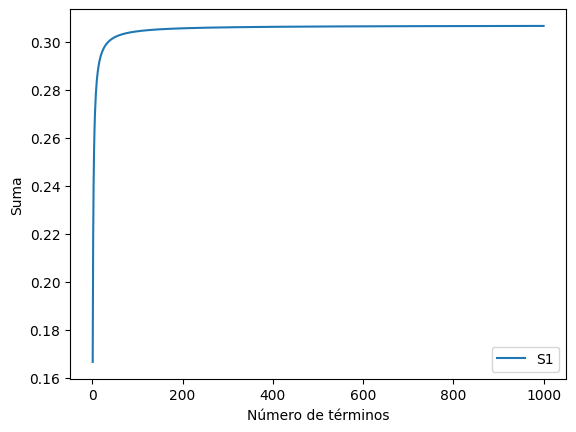

In [19]:
n_ = range(1, 1001)
v1 = [S1(n) for n in n_]
plt.plot(n_, v1,label='S1')
plt.xlabel("Número de términos")
plt.ylabel("Suma")
plt.legend()
plt.show()

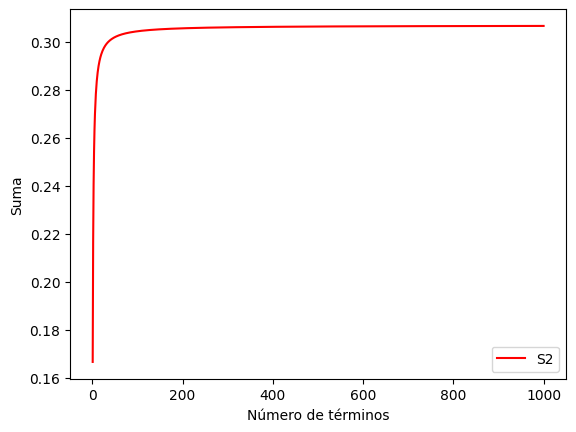

In [20]:
v2=[S2(n) for n in n_]
plt.plot(n_,v2,'r-',label='S2')
plt.xlabel("Número de términos")
plt.ylabel("Suma")
plt.legend()
plt.show()

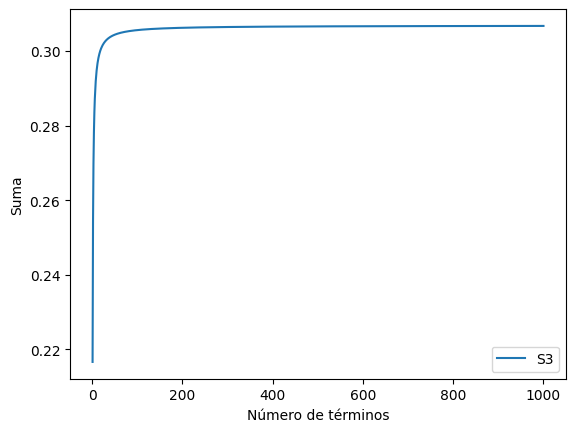

In [32]:
v3=[S3(n) for n in n_]
plt.plot(n_, v3,label='S3')
plt.xlabel("Número de términos")
plt.ylabel("Suma")
plt.legend()
plt.show()

- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)


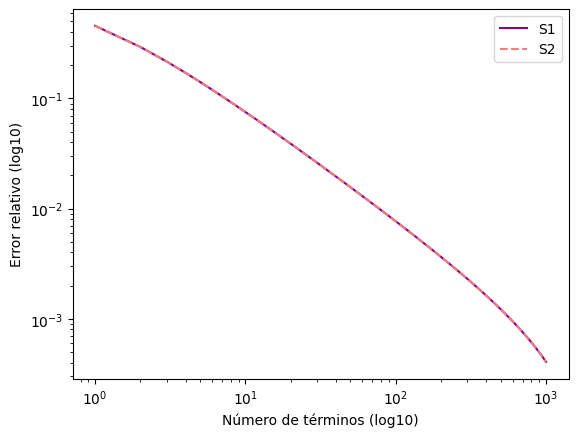

In [30]:
solucion = S3(1000)

N_ = np.arange(1, 1001)
S1_v = [abs((S1(N)-solucion)/solucion) for N in N_]
S2_v = [abs((S2(N)-solucion)/solucion) for N in N_]

plt.loglog(N_, S1_v, color='darkmagenta', label="S1")
plt.loglog(N_, S2_v, linestyle='--',color='lightcoral', label="S2")
plt.xlabel("Número de términos (log10)")
plt.ylabel("Error relativo (log10)")
plt.legend()
plt.show()